# Random forest

## what is random forest?

Think of a random forest as a group of decision trees like asking hundred friends for advice and taking the majority vote 
Instead of trusting one decision tree 
- create many trees with diffferent data 
- each tree gives decisions
- the forest takes the most popular decision, this helps make better , stronger, and less biased predictions 

## why use random forest?

| features | meaning |
|----------| ------- |
| more accurate | combines multiple opinions (trees)|
| handles missing values | can manage incomplete data |
| less overfiting | trees won't memories the data |
| it's slower | more trees is equal to more computations |


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [6]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
df=df[['survived','pclass','sex','age','fare','embarked']]
df=df.dropna()
print(df.head())

   survived  pclass     sex   age     fare embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S


In [10]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df['sex'])
df['embarked']=le.fit_transform(df['embarked'])

### define input features (X) and output (y)

In [11]:
X=df[['pclass','sex','age','fare','embarked']]
y=df['survived']

### split data(80% for training, 20% testing)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## we create a random forest with 100 trees and train it on training data

In [15]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### predict and evaluate

In [17]:
y_pred=rf.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7692307692307693


### classification report

In [18]:
print("classification report ",classification_report(y_test,y_pred))

classification report                precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.77      0.68      0.72        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



### confusion matrix

confusion matrix
 [[67 13]
 [20 43]]


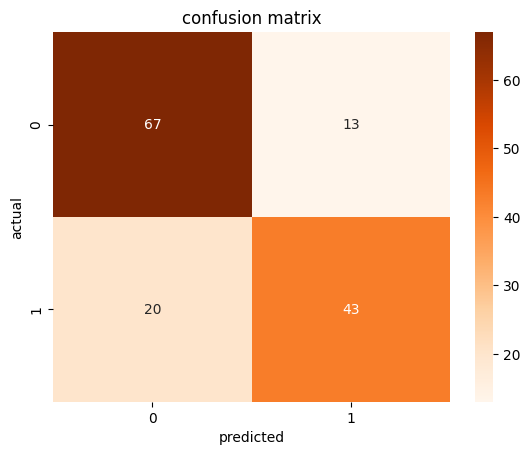

In [19]:
print("confusion matrix\n",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
 